In [8]:
__file__ = 'A1.ipynb'
import sys
import pathlib
sys.path.append(str(pathlib.Path(__file__).absolute().parent.parent)+"/FP4_lib")
import functions as f
import os
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from uncertainties import unumpy as up
from uncertainties import ufloat
import scipy.constants as const
import scipy.fft as fft
import lmfit

In [9]:
with open('Data/Aufgabe_3.txt','r') as tf:
    data = np.genfromtxt(tf).T
with open('Res/cp-cal_res.txt','r') as tf:
    cal = np.genfromtxt(tf).T
data = f.channel_to_pos(data,cal)
scale = 2/5.127868608985219#*1e-3
#data[0] = data[0]*scale
#data[2] = data[2]*scale

In [10]:
data[1] = data[1]*100
yerr = 0.035339825186025027*np.abs(data[1])
print(np.mean(data[2]))

0.0012903333866322712


von 4.255
bis 5.868

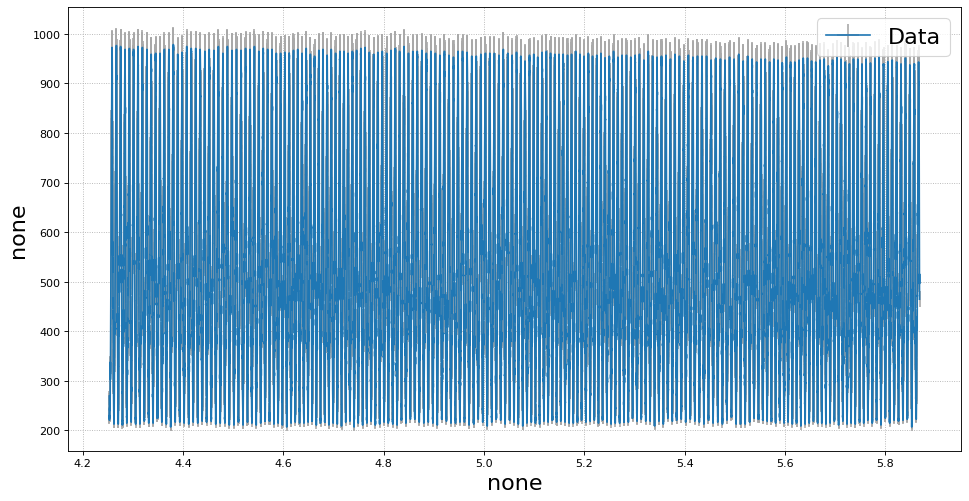

In [11]:
f.figsize(2)
plt.errorbar(data[0],data[1],xerr=data[2],yerr=yerr,label = 'Data',ecolor='darkgray')

f.form()
#f.form([4.4,5])[4.255,5.868]

[[Model]]
    Model(sin)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 2000
    # variables        = 4
    chi-square         = 19005.2511
    reduced chi-square = 9.52166886
    Akaike info crit   = 4511.13626
    Bayesian info crit = 4533.53987
    R-squared          = 0.99984685
[[Variables]]
    a:  309.485870 +/- 1.77287706 (0.57%) (init = 342)
    b:  747.651010 +/- 0.16869603 (0.02%) (init = 747)
    c: -197.599895 +/- 0.78450444 (0.40%) (init = -196)
    d: -17.6526063 +/- 1.38942534 (7.87%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(b, c) = -1.000
    C(a, d) = 0.733


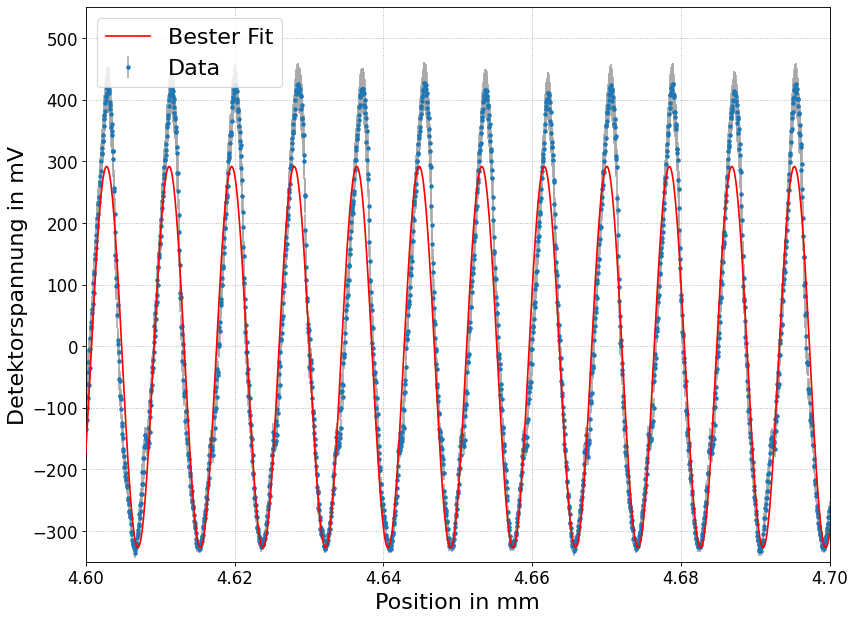

In [12]:
von , bis = f.pos(data[0],4.6),f.pos(data[0],4.7)
data[1] -= np.mean(data[1])
scale = 2/5.127868608985219

def sin(x,a,b,c,d):
    return a*np.sin(b*x+c)+d


model_func = lmfit.model.Model(sin)  

#parameter erstellen
pars_func = model_func.make_params()



pars_func["a"].set(value=342)#,min=0.01,max=1)
pars_func["b"].set(value=747)#,min=0.01,max=1)
pars_func["c"].set(value=-196)#,min=0.01,max=1)
pars_func["d"].set(value=1)#,min=0.01,max=1)
#Fitten
res = model_func.fit(data[1][von:bis],x=data[0][von:bis],params=pars_func,weights=1/yerr[von:bis],nan_policy='propagate')
print(res.fit_report())


f.figsize(1)
plt.plot(np.arange(4.2,5.8,0.0001),res.eval(x=np.arange(4.2,5.8,0.0001)),zorder = 10,label='Bester Fit',color='r')
plt.errorbar(data[0][von:bis],data[1][von:bis],yerr = yerr[von:bis],fmt='.',label = 'Data',ecolor='darkgray')
plt.ylim(-350,550)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
f.form([4.6,4.7],xlabel='Position in mm',ylabel='Detektorspannung in mV',name='Res/A3_sinfit.pdf')

In [13]:
freq = ufloat(res.params['b'].value,res.params['b'].stderr)
print((1e-3*np.pi*2/freq)*scale)

(3.2777+/-0.0007)e-06
